# Acquiring and represent images in Python

In [1]:
import matplotlib.pyplot as plt
#OpenCV for image processing
import cv2 

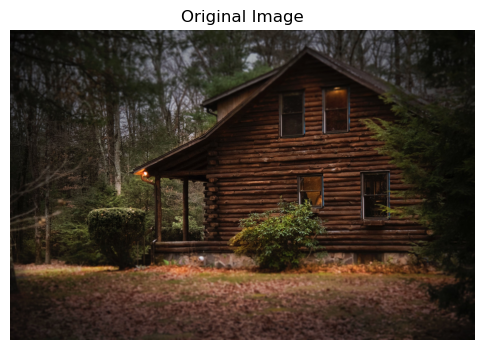

Image dimensions: Width = 1920, Height = 1282, Channels = 3


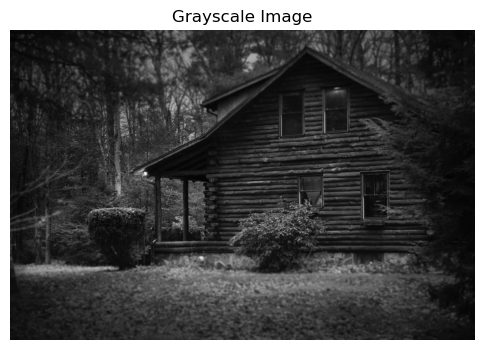

In [2]:
def load_and_display_image(image_path):
    # Load the image from file path
    image = cv2.imread(image_path)

    if image is None:
        print(f"Error: Could not load image from {image_path}")
        return

    # Display the original image
    plt.figure(figsize=(6, 4.5))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")
    plt.show()

    # Get image dimensions
    height, width, channels = image.shape
    print(f"Image dimensions: Width = {width}, Height = {height}, Channels = {channels}")

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(f'Desktop/gray_scale.jpg', gray_image)

    # Display the grayscale image
    plt.figure(figsize=(6, 4.5))
    plt.imshow(gray_image, cmap="gray")
    plt.title("Grayscale Image")
    plt.axis("off")
    plt.show()

if __name__ == "__main__":
    image_path = "Desktop/pexels-eneida-nieves-803975.jpg"
    load_and_display_image(image_path)


# resize images using different interpolation methods

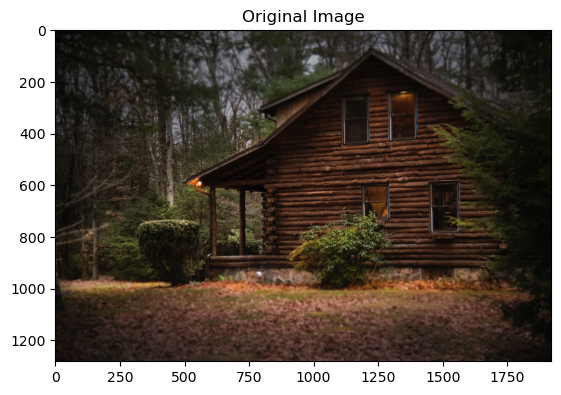

<Figure size 640x500 with 0 Axes>

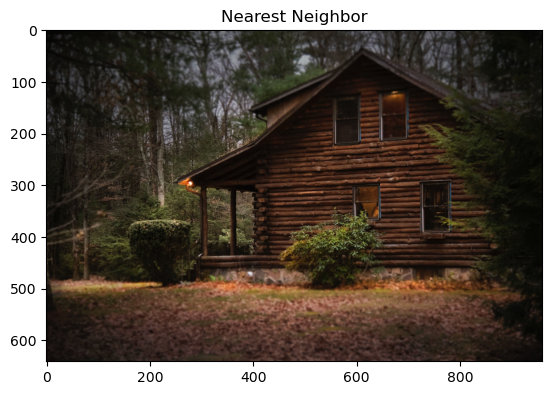

<Figure size 640x500 with 0 Axes>

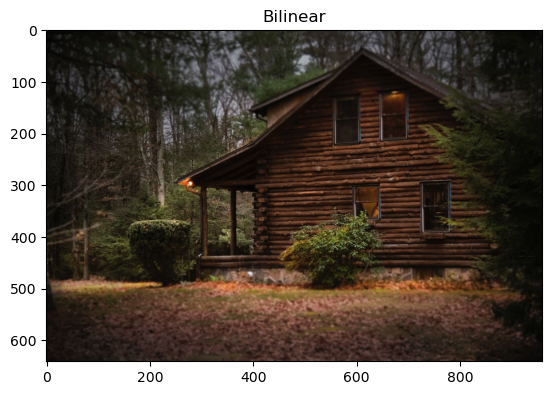

In [3]:
def resize_image(image_path, factor, interpolation):
    # Load the original image
    image = cv2.imread(image_path)
    
    # Calculate new dimension
    width, height = image.shape[:2]
    new_width = int(width * factor)
    new_height = int(height * factor)
    
    # Resize using the specified interpolation method
    resized_image = cv2.resize(image, (new_height, new_width), interpolation)

    
    return resized_image

def interpolation():
    image_path = "Desktop/pexels-eneida-nieves-803975.jpg"
    #original image
    og_image = cv2.imread(image_path)
    # Resize using nearest-neighbor interpolation
    nearest_resized = resize_image(image_path, 0.5, cv2.INTER_NEAREST)

    # Resize using bilinear interpolation
    bilinear_resized = resize_image(image_path, 0.5, cv2.INTER_LINEAR)
     

    # Display the nearest neighbor interpolated image
    plt.imshow(cv2.cvtColor(og_image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.figure(figsize=(6.4,5))
    plt.show()
    
    plt.imshow(cv2.cvtColor(nearest_resized, cv2.COLOR_BGR2RGB))
    plt.title('Nearest Neighbor')
    plt.figure(figsize=(6.4,5))
    plt.show()

    # Display the bilinear interpolated image
    plt.imshow(cv2.cvtColor(bilinear_resized, cv2.COLOR_BGR2RGB))
    plt.title('Bilinear')
    
    plt.show()
    
if __name__ == "__main__":
    interpolation()


#  rescale images while maintaining the aspect ratio

In [4]:
# Load the original image
image = cv2.imread("Desktop/pexels-eneida-nieves-803975.jpg")

# Get the original dimensions
height, width = image.shape[:2]

# desired width of image, say 400 pixels
desired_width = 400

# calculating the aspect ratio
aspect_ratio = width / height
#calculate the tarfet height to maintain aspect ratio
target_height = int(desired_width/aspect_ratio)

#resize image
resized_image = cv2.resize(image, (desired_width, target_height), 
                           interpolation=cv2.INTER_LINEAR)

# display resized image
cv2.imshow('Resized Image', resized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Rotate images by various angles

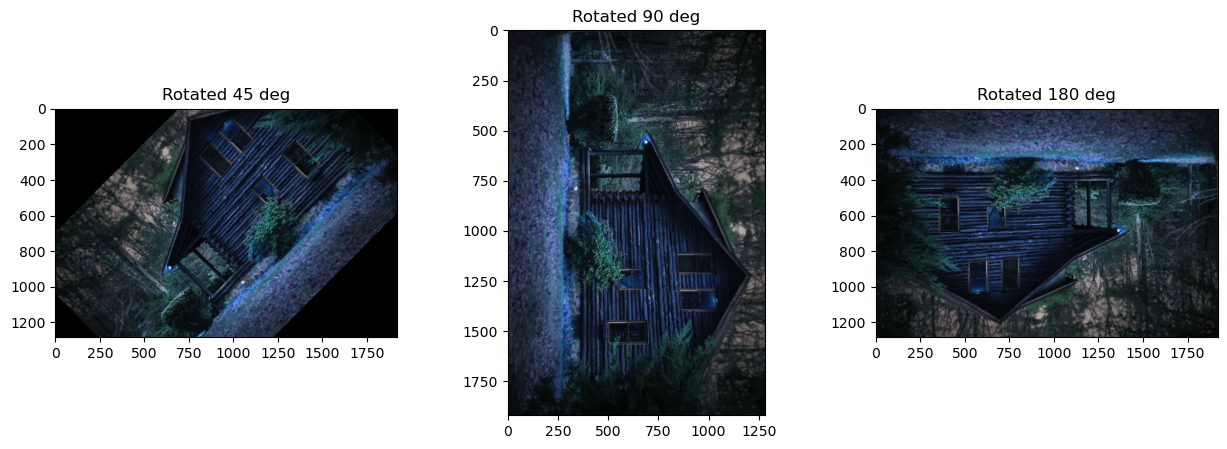

In [5]:
# Load the original image
image = cv2.imread("Desktop/pexels-eneida-nieves-803975.jpg")

#rotate image by 45 degree
from imutils import rotate
rotated_image1 = rotate(image, angle=45)

#rotate image by 90 degree
rotated_image2 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

# Rotate by 180 degrees clockwise
import numpy as np
rotated_image3 = np.rot90(image, k=2) #to rotate 180 deg

# Display the rotated images 
fig, axs = plt.subplots(1, 3, figsize=(15, 5)) 
axs[0].imshow(rotated_image1) 
axs[0].set_title('Rotated 45 deg') 
axs[1].imshow(rotated_image2) 
axs[1].set_title('Rotated 90 deg') 
axs[2].imshow(rotated_image3) 
axs[2].set_title('Rotated 180 deg') 
plt.show()         

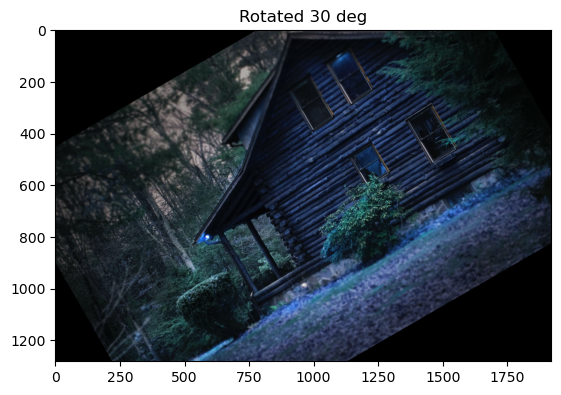

<Figure size 1500x1000 with 0 Axes>

In [6]:
# rotate by 30 degree
new_image = rotate(image, angle=30)

#display image
plt.imshow(new_image)
plt.title('Rotated 30 deg') 
plt.figure(figsize=(15,10))
plt.show()

# Modify the intensity of images.

In [7]:
from PIL import Image, ImageEnhance

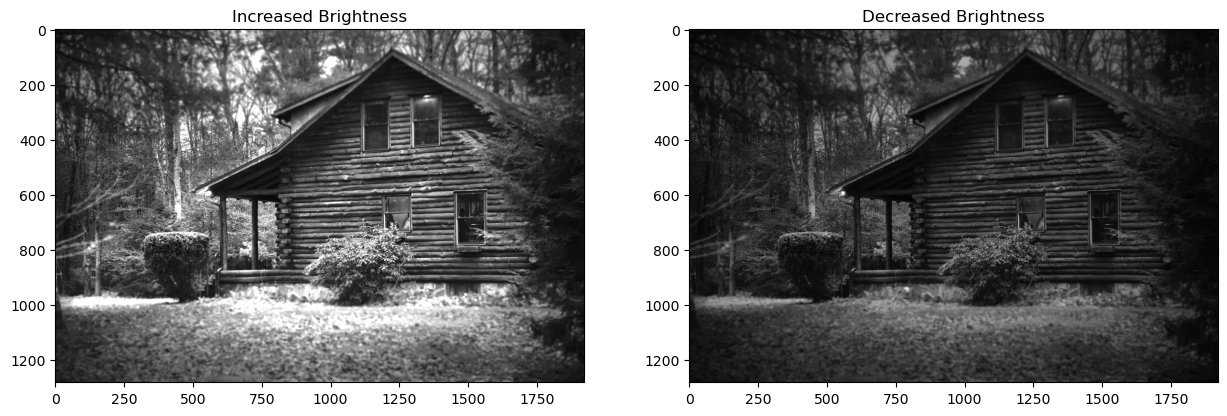

In [8]:
# Load the grayscale image
image = Image.open("Desktop/gray_scale.jpg")

#enhancing brightness of the image
enhancer = ImageEnhance.Brightness(image)

#gives bright image
brighten_image = enhancer.enhance(2)

#gives darker image
darken_image = enhancer.enhance(0.5)

fig, axs = plt.subplots(1, 2, figsize=(15, 5)) 
axs[0].imshow(brighten_image, cmap='gray') 
axs[0].set_title('Increased Brightness') 
axs[1].imshow(darken_image, cmap='gray') 
axs[1].set_title('Decreased Brightness') 
plt.show()

# Learn to crop images to focus on specific regions.

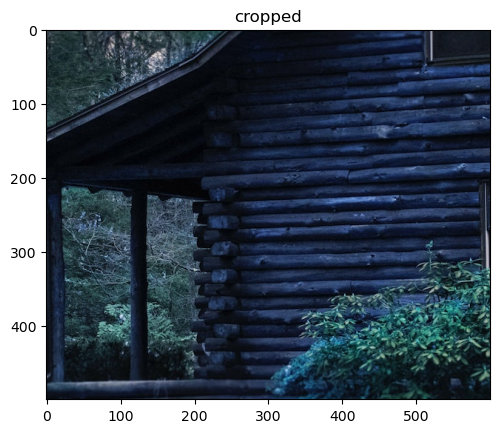

In [9]:
# Load the original image
image = cv2.imread("Desktop/pexels-eneida-nieves-803975.jpg")

x, y, w, h = 400, 600, 500, 600

crop_image = image[x:x+w, y:y+h]

plt.imshow(crop_image)
plt.title("cropped")
plt.show()

Enter the left coordinate: 400
Enter the top coordinate: 450
Enter the right coordinate: 550
Enter the bottom coordinate: 300


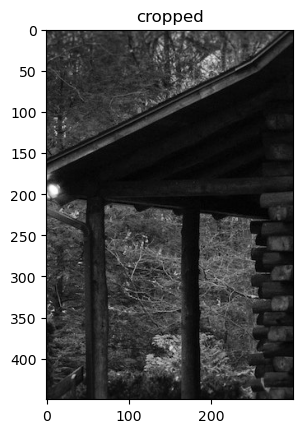

In [11]:
def crop_image_with_user_input(image_path):
    try:
        # Open the image
        image = cv2.imread(image_path)

        # Get user input for cropping coordinates
        left = int(input("Enter the left coordinate: "))
        top = int(input("Enter the top coordinate: "))
        right = int(input("Enter the right coordinate: "))
        bottom = int(input("Enter the bottom coordinate: "))

        # Crop the image
        img_res = image[left:left+top, right:right+bottom]

        #display the cropped image
        plt.imshow(img_res)
        plt.title("cropped")
        plt.show()

    except FileNotFoundError:
        print("Image file not found. Please provide a valid image path.")

# Example usage
image_path = r"Desktop/gray_scale.jpg"
crop_image_with_user_input(image_path)


# Detect edges in images using the Sobel filter.

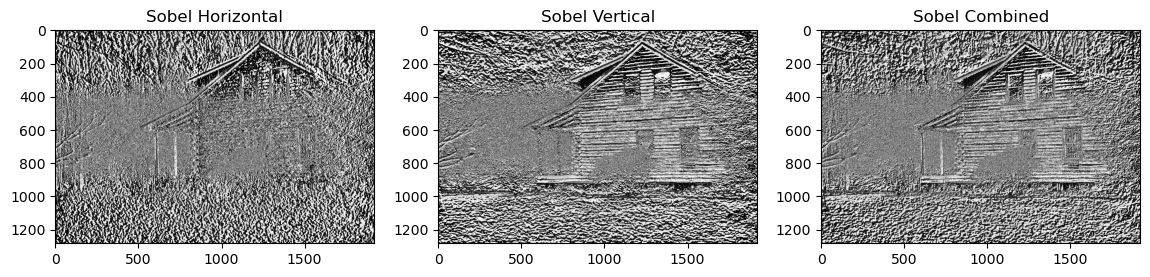

In [12]:
from scipy.ndimage import sobel, prewitt

# Load a grayscale image
image = 'Desktop/pexels-eneida-nieves-803975.jpg'
original_image = cv2.imread(image, cv2.IMREAD_GRAYSCALE)

# Calculate sobel filters for horizontal and vertical edges and both combined
sobel_h = sobel(original_image, axis=1) 
sobel_v = sobel(original_image, axis=0) 
sobel_combined = sobel_h + sobel_v

#display images
fig, axes = plt.subplots(1, 3, figsize=(14, 10)) 
axes[0].imshow(sobel_h, cmap='gray') 
axes[0].set_title('Sobel Horizontal') 
axes[1].imshow(sobel_v, cmap='gray') 
axes[1].set_title('Sobel Vertical') 
axes[2].imshow(sobel_combined, cmap='gray') 
axes[2].set_title('Sobel Combined')
plt.show()


# Detect edges in images using the Prewitt filter.

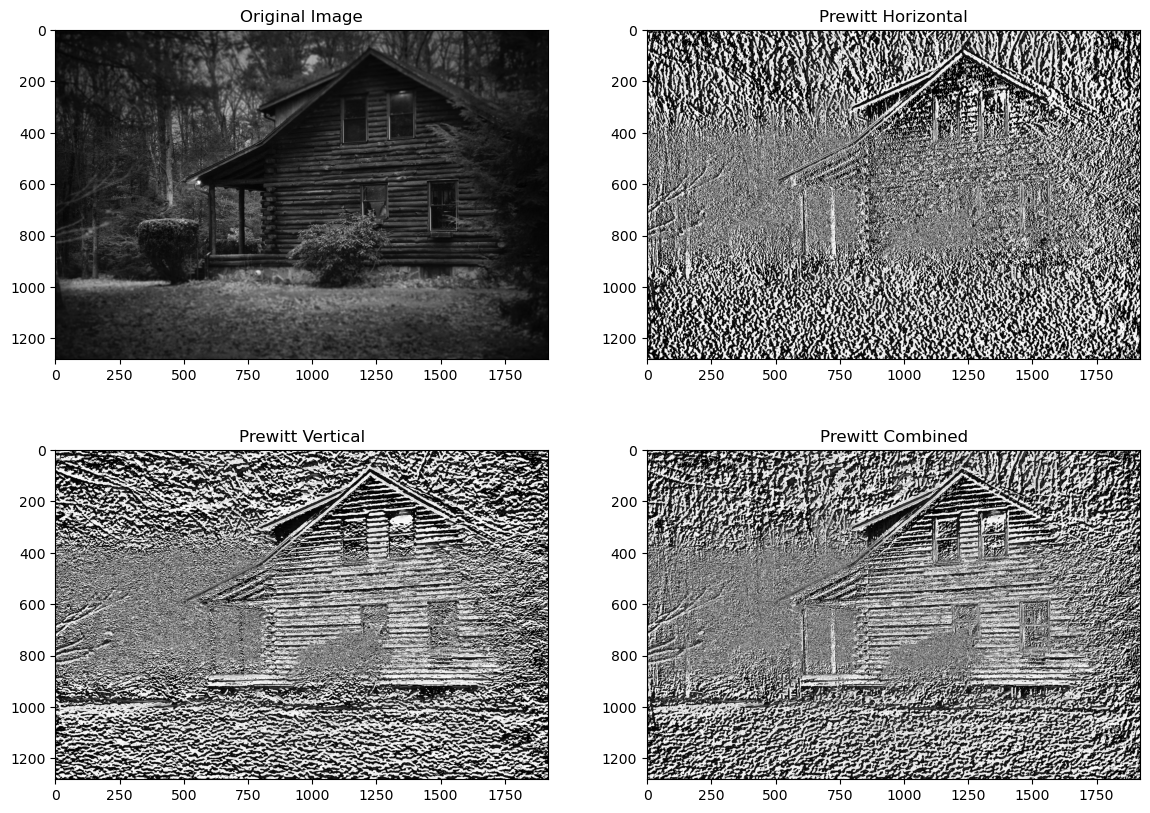

In [13]:
# Load a grayscale image
image = 'Desktop/pexels-eneida-nieves-803975.jpg'
original_image = cv2.imread(image, cv2.IMREAD_GRAYSCALE)

# Calculate Prewitt filters
prewitt_h = prewitt(original_image, axis=1) 
prewitt_v = prewitt(original_image, axis=0) 
prewitt_combined = prewitt_h + prewitt_v 

# Create a 2x2 subplot to display the results
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Show the images
axes[0, 0].imshow(original_image, cmap='gray') 
axes[0, 0].set_title('Original Image') 
axes[0, 1].imshow(prewitt_h, cmap='gray') 
axes[0, 1].set_title('Prewitt Horizontal') 
axes[1, 0].imshow(prewitt_v, cmap='gray') 
axes[1, 0].set_title('Prewitt Vertical') 
axes[1, 1].imshow(prewitt_combined, cmap='gray') 
axes[1, 1].set_title('Prewitt Combined') 
plt.show()

# Compare the effectiveness of the Sobel and Prewitt filters in edge detection.

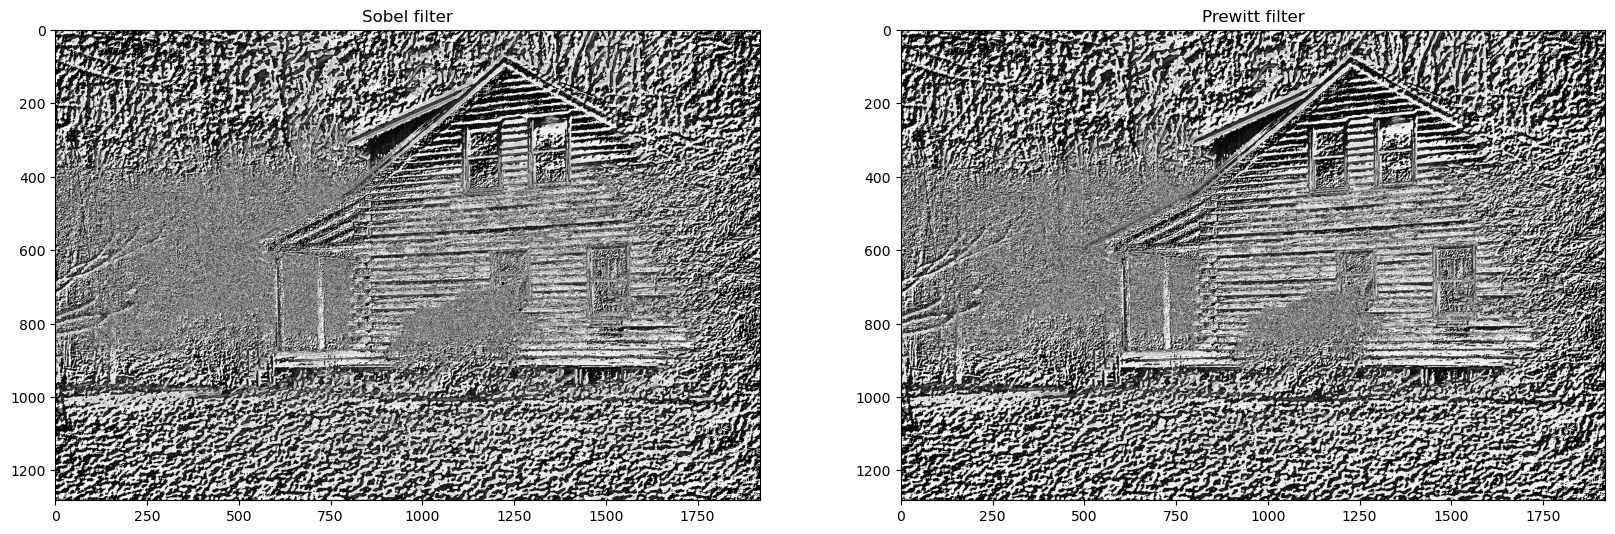

In [14]:
# Calculate sobel filters for horizontal and vertical edges and both combined
sobel_h = sobel(original_image, axis=1) 
sobel_v = sobel(original_image, axis=0) 
sobel_combined = sobel_h + sobel_v

# Calculate Prewitt filters
prewitt_h = prewitt(original_image, axis=1) 
prewitt_v = prewitt(original_image, axis=0) 
prewitt_combined = prewitt_h + prewitt_v 

#side by side comparison of both the images
fig, axes = plt.subplots(1, 2, figsize=(20, 15))
axes[0].imshow(sobel_combined, cmap='gray') 
axes[0].set_title('Sobel filter') 
axes[1].imshow(prewitt_combined, cmap='gray') 
axes[1].set_title('Prewitt filter')
plt.show()

# multiple image processing techniques in a small project.

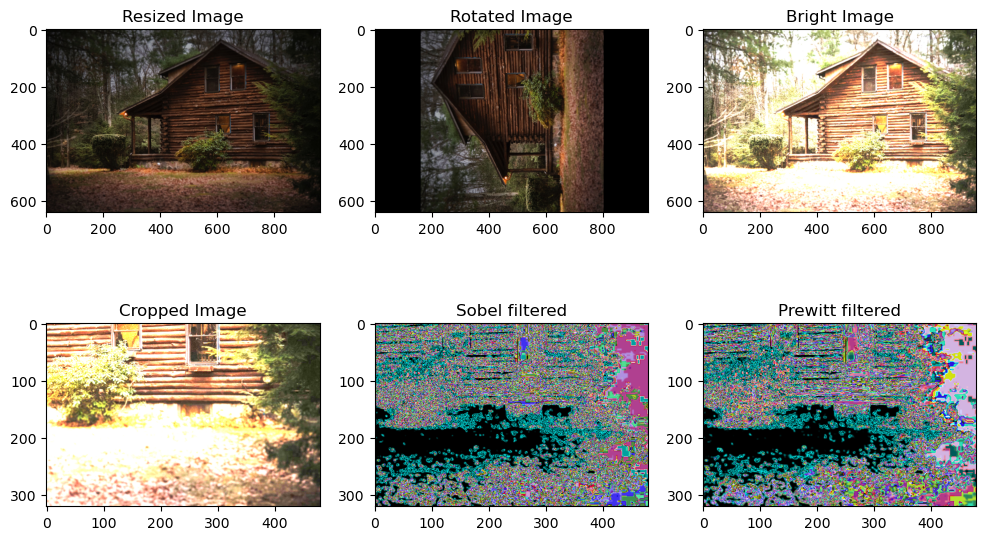

In [16]:
#importing libraries
import cv2
import matplotlib.pyplot as plt
from imutils import rotate
from scipy.ndimage import sobel, prewitt

#load an image
image = cv2.imread("Desktop/pexels-eneida-nieves-803975.jpg")

# Get image dimensions
height, width = image.shape[:2]

# Resize, rotate, adjust intensity, and crop 
resized_image = cv2.resize(image, (int(width * 0.5), int(height * 0.5))) 
rotated_image = rotate(resized_image, 90) 

#bright image
contrast, brightness = 4, 10
adjusted_image= cv2.convertScaleAbs(resized_image, alpha = 1+contrast, beta=brightness)

cropped_region = adjusted_image[height//4:3*height//4, width//4:3*width//4] 

# Apply Sobel and Prewitt edge detection on cropped region 
sobel_edges = sobel(cropped_region, axis=-1) 
prewitt_edges = prewitt(cropped_region, axis=-1) 

# Display all transformations 
fig, axes = plt.subplots(2, 3, figsize=(12, 7)) 
axes[0, 0].imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)) 
axes[0, 0].set_title('Resized Image')
axes[0, 1].imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB)) 
axes[0, 1].set_title('Rotated Image')
axes[0, 2].imshow(cv2.cvtColor(adjusted_image, cv2.COLOR_BGR2RGB)) 
axes[0, 2].set_title('Bright Image')
axes[1, 0].imshow(cv2.cvtColor(cropped_region, cv2.COLOR_BGR2RGB)) 
axes[1, 0].set_title('Cropped Image')
axes[1, 1].imshow(cv2.cvtColor(sobel_edges, cv2.COLOR_BGR2RGB)) 
axes[1, 1].set_title('Sobel filtered')
axes[1, 2].imshow(cv2.cvtColor(prewitt_edges, cv2.COLOR_BGR2RGB)) 
axes[1, 2].set_title('Prewitt filtered')
plt.show()